## Imports

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import ConfusionMatrixDisplay, recall_score, accuracy_score,f1_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier


## Read in cleaned data

In [2]:
df_subreddits = pd.read_csv('./00_cleaned_data/subreddits.csv')

In [3]:
df_subreddits.head()

,title,text,auth,time,subreddit,full_text,letter_count,word_count,subreddit_code
0,"Every woman who is not lesbian is gay, (girls ...",NaN,Altruistic_Rest_9861,1643317371,showerthoughts,"Every woman who is not lesbian is gay, (girls ...",131,26,0
1,Everyone keeps their phone on silent because w...,NaN,smcmahon710,1643317311,showerthoughts,Everyone keeps their phone on silent because w...,81,13,0
2,A good book will always be new.,NaN,agreatday248,1643317210,showerthoughts,A good book will always be new.,31,7,0
3,"Science can either prove that no deity exists,...",NaN,shimkei,1643317183,showerthoughts,"Science can either prove that no deity exists,...",132,26,0
4,The fact that I have to actively remind myself...,NaN,DawnMayRise,1643317126,showerthoughts,The fact that I have to actively remind myself...,118,22,0


## Train - Test - Split

In [4]:
X = df_subreddits['full_text']

y = df_subreddits['subreddit']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=10)

In [6]:
X_train.shape

(14548,)

In [7]:
X_test.shape

(4850,)

In [8]:
y_train.shape

(14548,)

In [9]:
y_test.shape

(4850,)

## Bagging classifier model

In [10]:
cv = CountVectorizer()

In [11]:
bc = BaggingClassifier()

In [12]:
pipe = make_pipeline(cv, bc)

In [13]:
params = {
    'baggingclassifier__n_estimators':[10, 20], 
    'baggingclassifier__max_samples':[0.9, 1.0],
    'countvectorizer__ngram_range':[(1,2), (1,3)], 
    'countvectorizer__max_df':[0.8, 0.9, 1],
    'countvectorizer__min_df':[0, 0.1, 0.2],
    'countvectorizer__stop_words':[None, 'english']
}

In [14]:
rs = RandomizedSearchCV(pipe, params, n_jobs=-1)

In [15]:
rs.fit(X_train, y_train)

/Users/annarutledge/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/annarutledge/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/annarutledge/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/annarutledge/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 348, in _fit
    X, fit

RandomizedSearchCV(estimator=Pipeline(steps=[('countvectorizer',
                                              CountVectorizer()),
                                             ('baggingclassifier',
                                              BaggingClassifier())]),
                   n_jobs=-1,
                   param_distributions={'baggingclassifier__max_samples': [0.9,
                                                                           1.0],
                                        'baggingclassifier__n_estimators': [10,
                                                                            20],
                                        'countvectorizer__max_df': [0.8, 0.9,
                                                                    1],
                                        'countvectorizer__min_df': [0, 0.1,
                                                                    0.2],
                                        'countvectorizer__ngram_range': [(1, 2),

In [16]:
rs.best_estimator_

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_df=0.9, min_df=0, ngram_range=(1, 2))),
                ('baggingclassifier', BaggingClassifier(n_estimators=20))])

In [17]:
pd.DataFrame(rs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_countvectorizer__stop_words,param_countvectorizer__ngram_range,param_countvectorizer__min_df,param_countvectorizer__max_df,param_baggingclassifier__n_estimators,param_baggingclassifier__max_samples,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.847563,0.030816,0.134488,0.011319,english,"(1, 2)",0.1,0.9,20,0.9,"{'countvectorizer__stop_words': 'english', 'co...",0.543643,0.542268,0.549141,0.549673,0.545892,0.546123,0.002925,7
1,2.835435,0.066177,0.239973,0.021277,None,"(1, 3)",0.2,0.9,20,0.9,"{'countvectorizer__stop_words': None, 'countve...",0.658076,0.643299,0.668385,0.652458,0.657271,0.655898,0.008162,6
2,5.222820,0.164018,0.182608,0.014239,None,"(1, 2)",0.1,0.9,20,1.0,"{'countvectorizer__stop_words': None, 'countve...",0.733333,0.701031,0.697251,0.710897,0.711585,0.710819,0.012549,4
3,1.020100,0.031460,0.169438,0.012675,english,"(1, 3)",0.1,0.9,20,1.0,"{'countvectorizer__stop_words': 'english', 'co...",0.539863,0.542268,0.548797,0.549330,0.546580,0.545367,0.003711,8
4,2335.956433,43.998411,1.507043,0.202797,None,"(1, 2)",0,1,20,0.9,"{'countvectorizer__stop_words': None, 'countve...",0.508935,0.502749,0.510997,0.509797,0.507391,0.507974,0.002864,9
5,147.363018,4.782065,0.403076,0.015898,None,"(1, 2)",0,0.8,20,0.9,"{'countvectorizer__stop_words': None, 'countve...",0.789691,0.782818,0.794845,0.791337,0.775524,0.786843,0.006880,2
6,3.315426,0.068864,0.225353,0.039191,None,"(1, 2)",0.1,0.8,10,0.9,"{'countvectorizer__stop_words': None, 'countve...",0.730241,0.682818,0.697251,0.708491,0.699553,0.703671,0.015635,5
7,1.123107,0.131896,0.000000,0.000000,english,"(1, 3)",0.2,0.8,10,0.9,"{'countvectorizer__stop_words': 'english', 'co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
8,246.452967,15.181883,0.391439,0.020786,english,"(1, 2)",0,0.8,20,0.9,"{'countvectorizer__stop_words': 'english', 'co...",0.751203,0.746735,0.742268,0.754555,0.742179,0.747388,0.004893,3
9,163.083255,15.265889,0.376947,0.021128,None,"(1, 2)",0,0.9,20,1.0,"{'countvectorizer__stop_words': None, 'countve...",0.795189,0.787285,0.801031,0.793744,0.781368,0.791723,0.006777,1


In [18]:
y_preds = rs.predict(X_test)

In [19]:
y_preds

array(['crazyideas', 'crazyideas', 'crazyideas', ..., 'showerthoughts',
       'crazyideas', 'crazyideas'], dtype=object)

### Accuracy score

In [20]:
rs.score(X_test, y_test)

0.791340206185567

In [21]:
accuracy_score(y_test, y_preds)

0.791340206185567

### Recall/sensitivity score

In [22]:
recall_score(y_test, y_preds, pos_label='crazyideas')

0.7872168284789643

### Precision score

In [23]:
precision_score(y_test, y_preds, pos_label='crazyideas')

0.8001644736842105

### F1 Score

In [24]:
f1_score(y_test, y_preds, pos_label='crazyideas')

0.7936378466557911

### Confusion Matrix

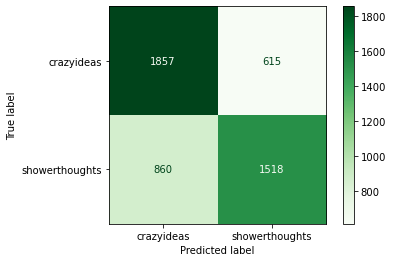

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds, cmap='Greens')